<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Дмитрий, доброго дня! рад приветствовать тебя вновь) <br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

## <a id='table of contents'>Содержание</a>  
<a href='#part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>     
<a href='#part2'>2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>    
<a href='#part3'>3. ПОДГОТОВКА ДАННЫХ</a>    
<a href='#part4'>4. АНАЛИЗ ДАННЫХ</a>  
<a href='#part5'>5. ПОДГОТОВКА К ОБУЧЕНИЮ МОДЕЛЕЙ </a>   
<a href='#part6'>6. ОБУЧЕНИЕ МОДЕЛЕЙ</a>   
<a href='#part7'>6.1. Обучение моделей для предсказания rougher.output.recovery</a>  
<a href='#part8'>6.2. Обучение моделей для предсказания final.output.recovery</a>  
<a href='#part9'>7.Расчет итогового sMAPE </a>     

# <a id='part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>
<a href='#table of contents'>к оглавлению</a>

***Цель:*** Построить модель машинного обучения, которая будет предсказывать коэффициент восстановления золота из золотосодержащей руды.   
***Целевая метрика:*** sMAPE 

# <a id='part2'> 2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

***Rougher feed*** — исходное сырье  
***Rougher additions (или reagent additions)*** — флотационные реагенты: Xanthate, Sulphate, Depressant  
***Xanthate*** — ксантогенат (промотер, или активатор флотации)  
***Sulphate*** — сульфат (на данном производстве сульфид натрия)  
***Depressant*** — депрессант (силикат натрия)  
***Rougher process (англ. «грубый процесс»)*** — флотация  
***Rougher tails*** — отвальные хвосты  
***Float banks*** — флотационная установка  
***Cleaner process*** — очистка  
***Rougher Au*** — черновой концентрат золота  
***Final Au*** — финальный концентрат золота  

### Параметры этапов###

***air amount*** — объём воздуха  
***fluid levels*** — уровень жидкости  
***feed size*** — размер гранул сырья  
***feed rate*** — скорость подачи  

### Наименование признаков###

[этап].[тип_параметра].[название_параметра]  
***Пример:*** rougher.input.feed_ag  
***Возможные значения для блока [этап]:***  
***rougher*** — флотация  
***primary_cleaner*** — первичная очистка  
***secondary_cleaner*** — вторичная очистка  
***final*** — финальные характеристики  
***Возможные значения для блока [тип_параметра]:***  
***input*** — параметры сырья  
***output*** — параметры продукта  
***state*** — параметры, характеризующие текущее состояние этапа  
***calculation*** — расчётные характеристики  

### Целевые признаки ###

***rougher.output.recovery*** - эффективность обогащения чернового концентрата  
***final.output.recovery*** - эффективность обогащения финального концентрата

In [1]:
import pandas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from IPython.display import Image
from scipy import stats as st
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
try:
    df_train=pd.read_csv('gold_recovery_train.csv', sep=',') 
    df_test=pd.read_csv('gold_recovery_test.csv', sep=',') 
    df_full=pd.read_csv('gold_recovery_full.csv', sep=',') 
except: 
    df_train=pd.read_csv('/datasets/gold_recovery_train.csv', sep=',') 
    df_test=pd.read_csv('/datasets/gold_recovery_test.csv', sep=',') 
    df_full=pd.read_csv('/datasets/gold_recovery_full.csv', sep=',')  
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_sum=[df_train, df_test, df_full]

In [3]:
for i in df_sum:
    display(i.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,...,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,...,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,...,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,...,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,...,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


In [4]:
for i in df_sum:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

None

***Систематизируем столбцы по переделам для тренировочного датасета:***

***date*** - время начала технологического этапа 
Всего 3 этапа, на каждом имеется содержание элементов (ag, pb, au) в исходном сырье и содержание элементов (ag, pb, au) в продукте получаемом после этапа, а также параметры процесса  

***Флотация*** 
 - Содержание в исходной руде:
 rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_au, rougher.input.feed_sol (содержание солей видимо)
 - Параметры процесса - rougher.input.feed_rate (скорость подачи сырья),  
 rougher.input.feed_size - степень измельчения  сырья,   
 rougher.input.floatbank10_sulfate - расход сульфида натрия (почему тогда сульфат???! это сульфид! на установке 10),        
 rougher.input.floatbank10_xanthate - расход ксантогената на установке 10),  
 rougher.input.floatbank11_sulfate - расход ксантогената на установке 11),   
 rougher.input.floatbank11_xanthate - расход ксантогената на установке 11),   
 rougher.state.floatbank10_(a-f)_air - расход воздуха в процессе флотации (a-f - видимо обозначает циклы) на установке 10,  
 rougher.state.floatbank10_(a-f)_level - расход жидкости в процессе флотации (a-f - видимо обозначает циклы) на установке 10
 - Содержание в черновом концентрате и хвостах флотации:
rougher.output.concentrate_ag, rougher.output.concentrate_pb, rougher.output.concentrate_au, rougher.output.concentrate_sol, rougher.output.tail_ag, rougher.output.tail_pb, rougher.output.tail_au, rougher.output.tail_sol
 - Рассчитанные характеристики процесса - rougher.calculation.sulfate_to_au_concentrate - относительный расход сульфида натрия по отношению к золоту в концентрате,  
rougher.calculation.floatbank(10-11)_sulfate_to_au_feed - относительный расход сульфида натрия по отношению к золоту в исходной руде на установках 10 и 11,  
 rougher.output.recovery - эффективность обогащения на этапе флотации,  
 rougher.calculation.au_pb_ratio - отношения содержания золота к свинцу в концентрате
 
***Первый этап очистки*** 
- Параметры процесса (расход реагентов) и параметры работы флотационных машин:  
primary_cleaner.input.sulfate - расход сульфида натрия,  
primary_cleaner.input.depressant - расход депресанта,  
primary_cleaner.input.feed_size - размер частиц,  
primary_cleaner.input.xanthate - расход ксантогената,  
primary_cleaner.state.floatbank8_(a-d)_air - расход воздуха на флотомашине 8,    
primary_cleaner.state.floatbank8_(a-d)_level - расход жидкости на флотомашине 8
- Содержание в концентрате и хвостах флотации после первой очистки:  
primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol,
primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, 
primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au  

***Второй этап очистки*** 
- Содержание в хвостах флотации:  
secondary_cleaner.output.tail_ag, secondary_cleaner.output.tail_pb, secondary_cleaner.output.tail_sol  
- Параметры процесса:  
secondary_cleaner.state.floatbank(2-6)_(a-с)_air - расход воздуха на флотомашинах 2-6   
secondary_cleaner.state.floatbank(2-6)_(a-с)_level - расход жидкости на флотомашинах 2-6  

***Финальный концентрат*** 
- Содержание в итоговых концентрате и хвостах:  
final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, 
final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au

- Расcчитанные параметры:    
final.output.recovery - извлечение в конечный концентрат 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
ОК, данные на базе) Судя по описанию - внимательно их изучил, ОК!

# <a id='part3'> 3. ПОДГОТОВКА ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

***Проверим правильность расчета эффективности обогащения***

Эффективность обогащения рассчитвается по формуле

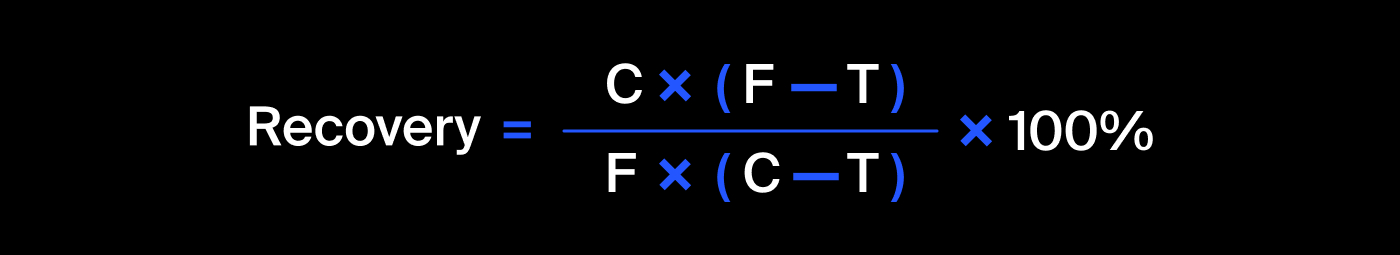

In [5]:
display(Image('https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg'))

где 
- C - доля золота в концентрате после флотации/очистки;
- F - доля золота в сырье/концентрате до флотации/очистки;
- T - доля золота в отвальных хвостах после флотации/очистки.

Напишем функцию для расчета степени извлечения

In [6]:
def recovery (row):
    C=row['rougher.output.concentrate_au']
    F=row['rougher.input.feed_au']
    T=row['rougher.output.tail_au']
    REC=(C*(F-T))/(F*(C-T))*100
    return REC

In [7]:
df_train_recovery=df_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', \
                            'rougher.output.tail_au', 'rougher.output.recovery']]
try:
    df_train_recovery['recovery_verification']=df_train_recovery.apply(recovery, axis=1)
except ZeroDivisionError:
    print("Error")

display(df_train_recovery)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,recovery_verification
0,19.79,6.49,1.17,87.11,87.11
1,20.05,6.48,1.18,86.84,86.84
2,19.74,6.36,1.16,86.84,86.84
3,19.32,6.12,1.08,87.23,87.23
4,19.22,5.66,1.01,86.69,86.69
...,...,...,...,...,...
16855,18.60,5.34,0.75,89.57,89.57
16856,18.44,4.84,0.77,87.72,87.72
16857,15.11,4.53,0.69,88.89,88.89
16858,17.83,4.36,0.57,89.86,89.86


Рассчитаем MAE

In [8]:
#посчитаем количество пропусков

display(df_train_recovery[['rougher.output.concentrate_au', 'rougher.input.feed_au', \
                            'rougher.output.tail_au', 'rougher.output.recovery', 'recovery_verification']].isnull().sum())

#удалим пропуски

df_train_recovery=df_train_recovery[['rougher.output.concentrate_au', 'rougher.input.feed_au', \
                            'rougher.output.tail_au', 'rougher.output.recovery', 'recovery_verification']].dropna()
df_train_recovery.info()

rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
rougher.output.recovery          2573
recovery_verification            2283
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 5 columns):
rougher.output.concentrate_au    14287 non-null float64
rougher.input.feed_au            14287 non-null float64
rougher.output.tail_au           14287 non-null float64
rougher.output.recovery          14287 non-null float64
recovery_verification            14287 non-null float64
dtypes: float64(5)
memory usage: 669.7 KB


In [9]:
mae = mean_absolute_error(df_train_recovery['rougher.output.recovery'], df_train_recovery['recovery_verification'])
print('Абсолютное отклонение для расчета mae', mae)

Абсолютное отклонение для расчета mae 9.444891926100695e-15


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
отлично, есть контакт)

***Обработаем нулевые  значения***

Нулевые значения в исходной руде могут быть связаны с точностью измерения концентрации элемента. Например, прибор определяет концентрацию элемента с точность до 3 знаков, а в исходной пробе содержание элемента в 4 знаке. После обогащения, концентрация элемента увеличивается и прибор уже фиксирует содержание элемента, хотя в исходной пробе оно было равно 0. Также нулевые значения могут быть связаны с ошибками в определениях, поэтому пока оставим нулевые значения без изменений и посмотрим, что делать с ними на следующих этапах

***Обработаем пропуски***

Исходя из того, что близкие по времени значения схожи можно заменить пропуски предыдущим по времени значением

In [10]:
df_train=df_train.fillna(method='ffill')
df_test=df_test.fillna(method='ffill')
df_full=df_full.fillna(method='ffill')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
да, ы этом проекте - хорошо подходит!

### ВЫВОД 1###
- Абсолютное отклонение очень маленькое, а это значит что показатель ***recovery*** рассчитан верно
- Данные которые отсутствуют в тестовой выборке являются промежуточными данными, которые мы получаем в результате обработки руды. Так как эти данные появляются в ходе процесса их нельзя использовать для предсказания
- Пропуски в данных можно заменить на ближайшее по времени значение

# <a id='part4'> 4. АНАЛИЗ ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

***Проанализируем изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки***

Создадим функцию для построения графиков

In [11]:
def concentrate_plot(data1,data2,data3, data4):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data1.plot(kind='hist', bins=100, figsize=(16,8), alpha=.5, density=True, title=name,
                    label=('Содержание элемента в исходной руде'), legend=True, grid=True)

    data2.plot(kind='hist', bins=100, figsize=(16,8), alpha=.5,  density=True,
                     label=('Содержание элемента после флотации'), legend=True, grid=True)

    data3.plot(kind='hist', bins=100, figsize=(16,8), alpha=.5, density=True,
                     label=('Содержание элемента после первой очистки'), legend=True, grid=True)

    data4.plot(kind='hist', bins=100, figsize=(16,8), alpha=.5, density=True,
                     label=('Содержание элемента после второй очистки'), legend=True, grid=True)
    plt.xlabel('Концентрация элемента', fontsize = 15)
    plt.ylabel('Частота', fontsize = 15)
    plt.show()

Выведем изменение содержания золота в концентрате по технологическим переделам

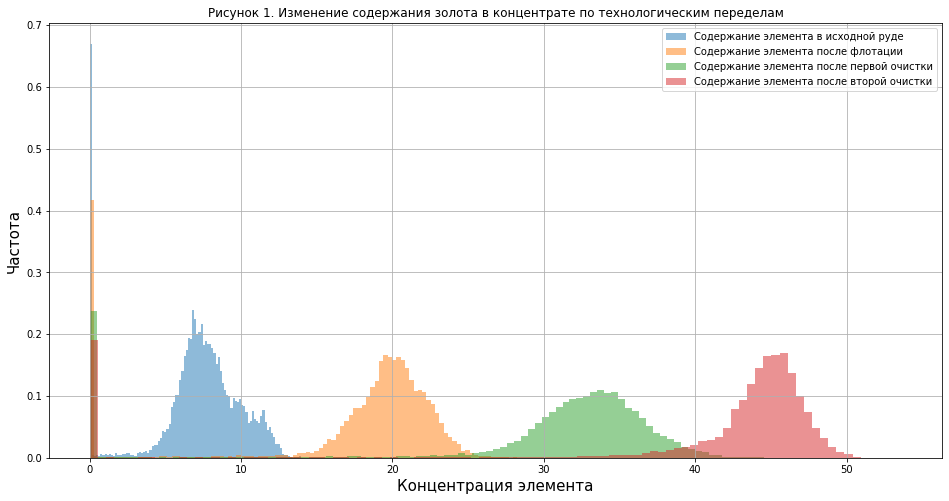

In [12]:
name='Рисунок 1. Изменение содержания золота в концентрате по технологическим переделам'
concentrate_plot (df_train['rougher.input.feed_au'], df_train['rougher.output.concentrate_au'],
                 df_train['primary_cleaner.output.concentrate_au'], df_train['final.output.concentrate_au'])

Выведем изменение содержания серебра в концентрате по технологическим переделам

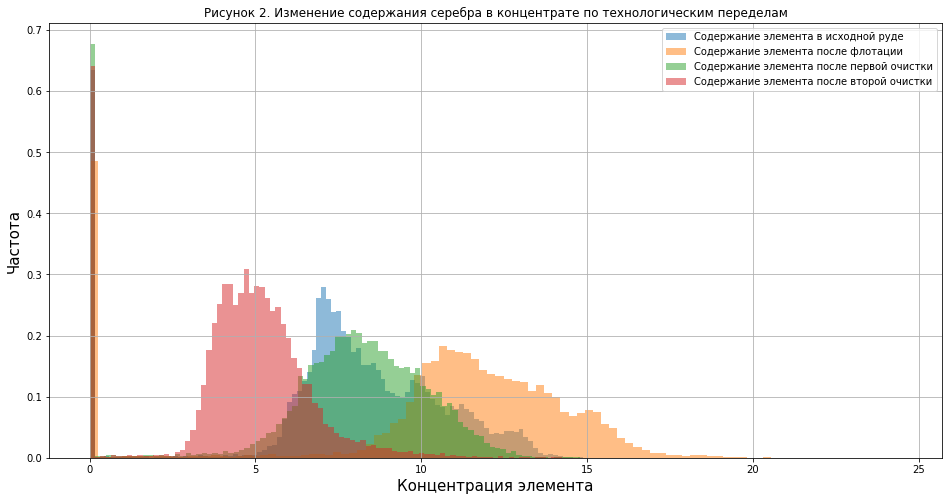

In [13]:
name='Рисунок 2. Изменение содержания серебра в концентрате по технологическим переделам'
concentrate_plot (df_train['rougher.input.feed_ag'], df_train['rougher.output.concentrate_ag'],
                 df_train['primary_cleaner.output.concentrate_ag'], df_train['final.output.concentrate_ag'])

Выведем изменение содержания свинца в концентрате по технологическим переделам

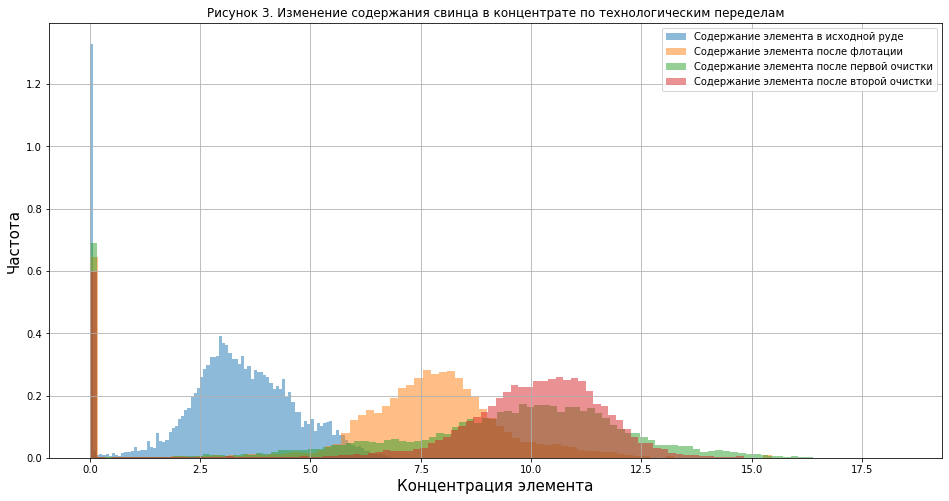

In [14]:
name='Рисунок 3. Изменение содержания свинца в концентрате по технологическим переделам'
concentrate_plot (df_train['rougher.input.feed_pb'], df_train['rougher.output.concentrate_pb'],
                 df_train['primary_cleaner.output.concentrate_pb'], df_train['final.output.concentrate_pb'])

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
Здорово получилось) удобный графический анализ. И видно, что золотишко растёт - и это хорошо, кому-то).<br>
а свинец - побочное дитя химических реакций)

***Сравним распределение размеров гранул сырья на обучающей и тестовой выборках***

Выведем распределение размеров гранул сырья по переделам по обучающей и тренировочной выборкам

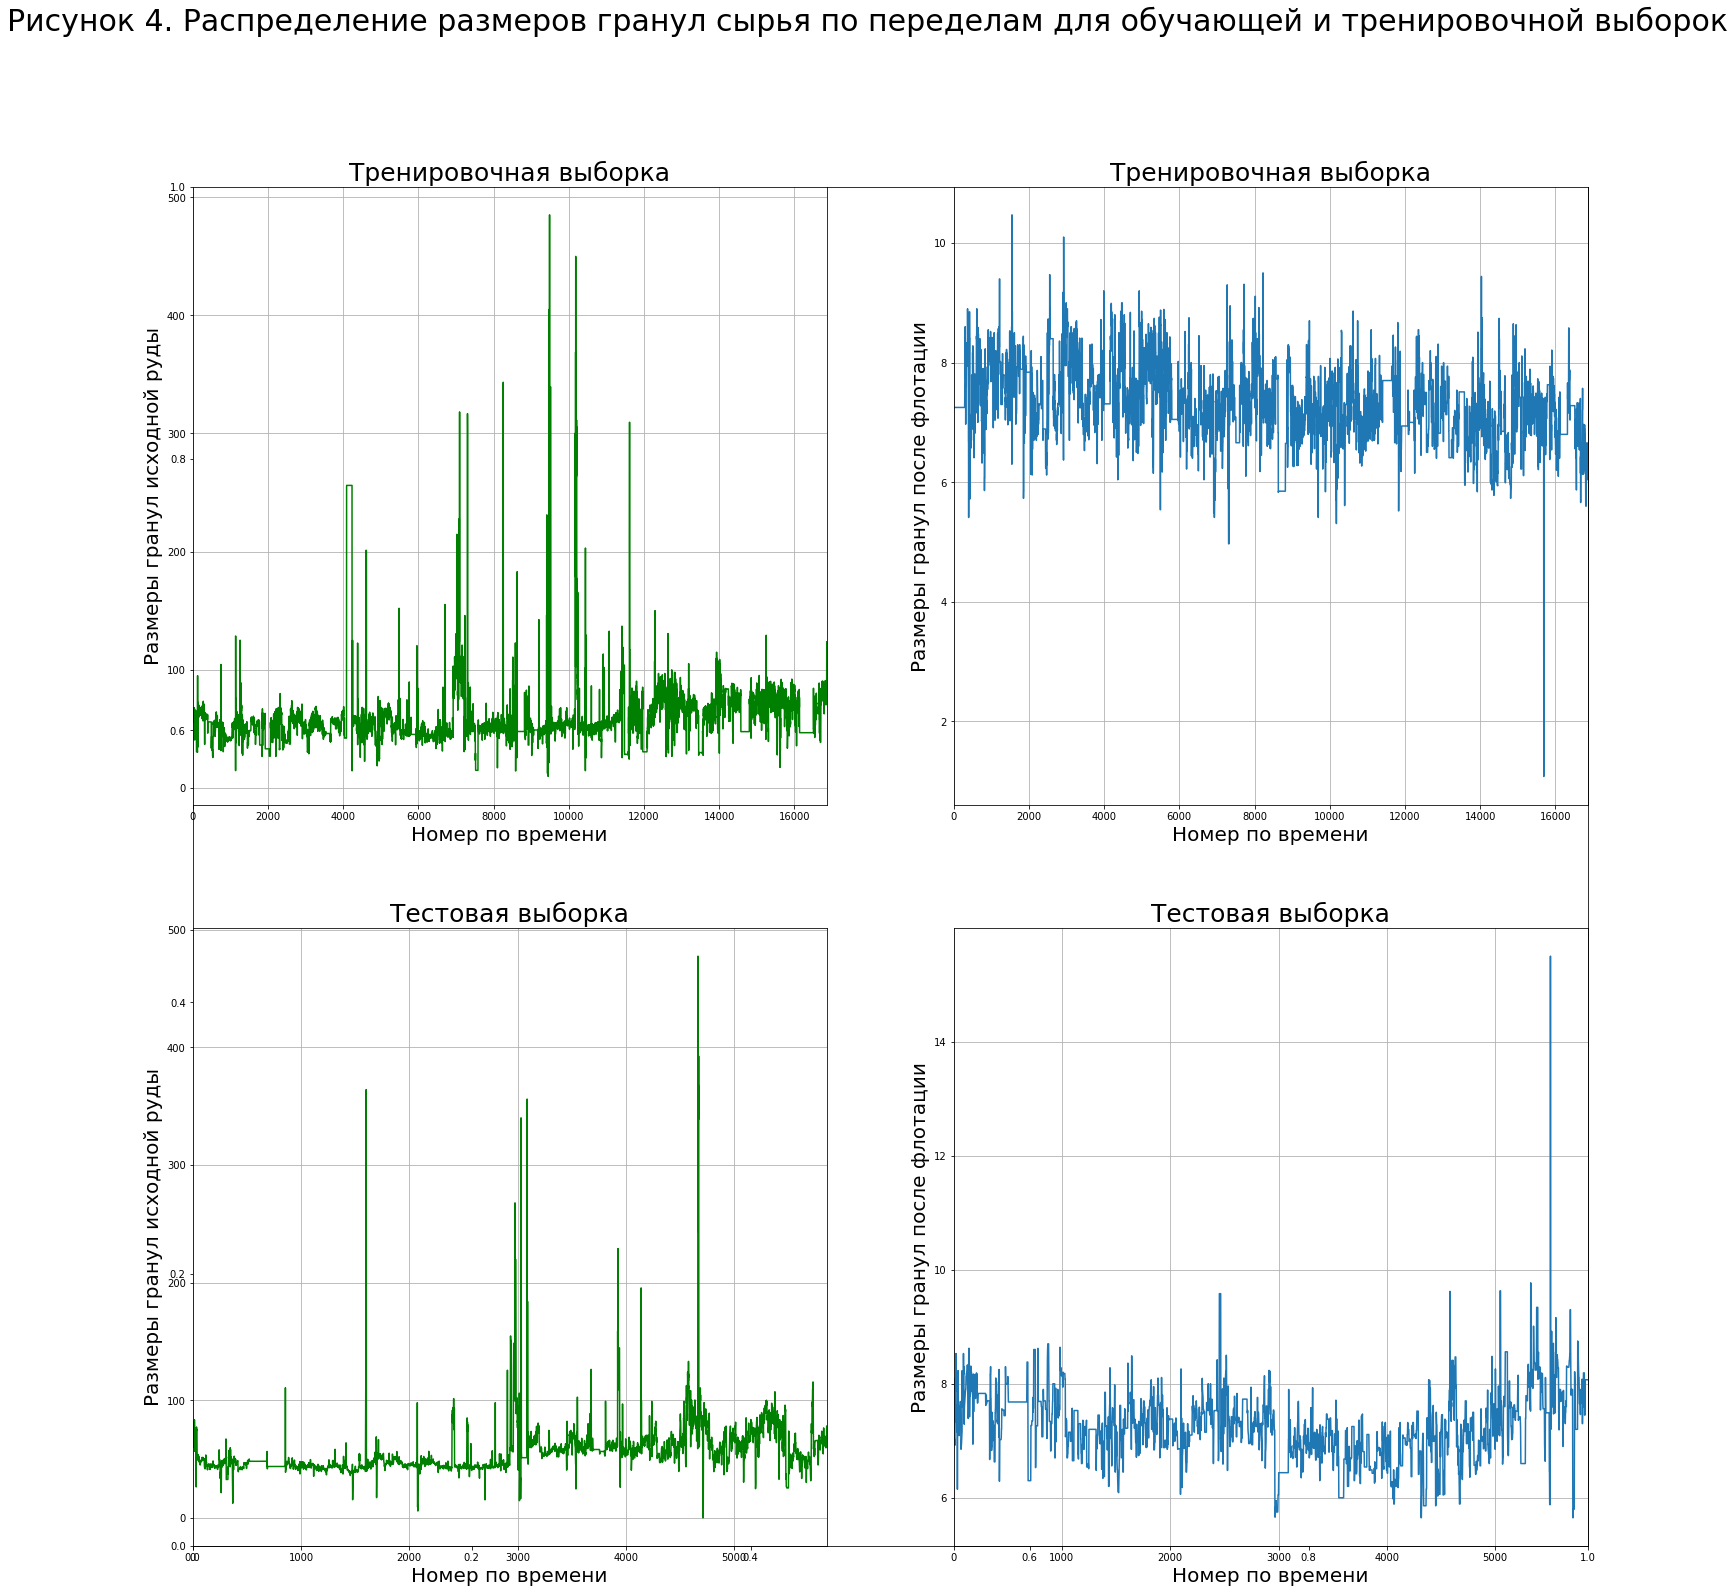

In [15]:
text_size_axis=20
text_size_title=25
fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
fig.suptitle('Рисунок 4. Распределение размеров гранул сырья по переделам для обучающей и тренировочной выборок', fontsize = 30) 

ax_1 = fig.add_subplot(2, 2, 1)
df_train['rougher.input.feed_size'].plot(grid=True, color='green')

plt.xlabel('Номер по времени', fontsize = text_size_axis)
plt.ylabel('Размеры гранул исходной руды', fontsize = text_size_axis)

ax_1.set_title('Тренировочная выборка',
                  fontsize = text_size_title)

ax_2 = fig.add_subplot(2, 2, 2)

plt.xlabel('Номер по времени', fontsize = text_size_axis)
plt.ylabel('Размеры гранул после флотации', fontsize = text_size_axis)

df_train['primary_cleaner.input.feed_size'].plot(grid=True)

ax_2.set_title('Тренировочная выборка',
                  fontsize = text_size_title)

ax_3 = fig.add_subplot(2, 2, 3)
df_test['rougher.input.feed_size'].plot(grid=True, color='green')

plt.xlabel('Номер по времени', fontsize = text_size_axis)
plt.ylabel('Размеры гранул исходной руды', fontsize = text_size_axis)

ax_3.set_title('Тестовая выборка',
                  fontsize = text_size_title)

ax_4 = fig.add_subplot(2, 2, 4)

plt.xlabel('Номер по времени', fontsize = text_size_axis)
plt.ylabel('Размеры гранул после флотации', fontsize = text_size_axis)

df_test['primary_cleaner.input.feed_size'].plot(grid=True)

ax_4.set_title('Тестовая выборка',
                  fontsize = text_size_title)

plt.show()

***Проверим гипотезу о равенстве средних распределений***

In [16]:
rougher_input_feed_size_train=np.var(df_train['rougher.input.feed_size'])
primary_cleaner_input_feed_size_train=np.var(df_train['primary_cleaner.input.feed_size'])
rougher_input_feed_size_test=np.var(df_test['rougher.input.feed_size'])
primary_cleaner_input_feed_size_test=np.var(df_test['primary_cleaner.input.feed_size'])
                               
print("Дисперсия размера сырья исходной руды на тренировочной выборке", rougher_input_feed_size_train)
print("Дисперсия размера сырья после флотации на тренировочной выборке", primary_cleaner_input_feed_size_train)
print("Дисперсия размера сырья исходной руды на тестовой выборке", rougher_input_feed_size_test)
print("Дисперсия размера сырья после флотации на тестовой выборке", primary_cleaner_input_feed_size_test)

Дисперсия размера сырья исходной руды на тренировочной выборке 931.552027276111
Дисперсия размера сырья после флотации на тренировочной выборке 0.3833435011940952
Дисперсия размера сырья исходной руды на тестовой выборке 515.5638118510055
Дисперсия размера сырья после флотации на тестовой выборке 0.3738999193991393


Сформулируем нулевую гипотезу. Hо - Среднее значение размеров сырья для тренировочной и тестовой выборок равны.
Альтернативная гипотеза - Среднее значение размеров сырья для тренировочной и тестовой выборок различаются.

In [17]:
#зададим критический уровень статистической значимости, alpha=0.05. 

#Дисперсии сильно не отличаются, поэтому параметр equal_var установим True

sample_1 = df_train['rougher.input.feed_size']

sample_2 = df_test['rougher.input.feed_size']

alpha = 0.05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для размеров исходного сырья")
else:
    print("Не получилось отвергнуть нулевую гипотезу размеров исходного сырья") 

p-значение: 7.63075072511601e-23
Отвергаем нулевую гипотезу для размеров исходного сырья


In [18]:
#зададим критический уровень статистической значимости, alpha=0.05. 

#Дисперсии сильно не отличаются, поэтому параметр equal_var установим True

sample_1 = df_train['primary_cleaner.input.feed_size']

sample_2 = df_test['primary_cleaner.input.feed_size']

alpha = 0.05 

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу для размеров сырья после флотации")
else:
    print("Не получилось отвергнуть нулевую гипотезу для размеров сырья после флотации") 

p-значение: 0.0004916543727368148
Отвергаем нулевую гипотезу для размеров сырья после флотации


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
Ок, идея работы понятно.

***Выведем суммарную концентрацию всех веществ на разных стадиях: в исходной руде, в черновом и финальном концентратах***

Для тренировочной выборки

In [19]:
rougher_input_feed_sum=df_train['rougher.input.feed_au'].sum()+df_train['rougher.input.feed_ag'].sum()+\
df_train['rougher.input.feed_pb'].sum()
    
primary_cleaner_output_concentrate_sum=df_train['primary_cleaner.output.concentrate_au'].sum()+\
df_train['primary_cleaner.output.concentrate_ag'].sum()+\
df_train['primary_cleaner.output.concentrate_pb'].sum()
        
final_output_concentrate_sum=df_train['final.output.concentrate_au'].sum()\
+df_train['final.output.concentrate_ag'].sum()+\
df_train['final.output.concentrate_pb'].sum()


data = {'Элемент': ['Au', 'Ag', 'Pb', 'Сумма всех элементов на этапе'], 
        'Суммарная концентрация в исходной руде': [df_train['rougher.input.feed_au'].sum(),  
        df_train['rougher.input.feed_ag'].sum(),
        df_train['rougher.input.feed_pb'].sum(), rougher_input_feed_sum],
        'Суммарная концентрация в черновом концентрате:': 
        [df_train['primary_cleaner.output.concentrate_au'].sum(), df_train['primary_cleaner.output.concentrate_ag'].sum(),
        df_train['primary_cleaner.output.concentrate_pb'].sum(), primary_cleaner_output_concentrate_sum],
        'Суммарная концентрация в финальном концентрате:': 
        [df_train['final.output.concentrate_au'].sum(), df_train['final.output.concentrate_ag'].sum(),
        df_train['final.output.concentrate_pb'].sum(), final_output_concentrate_sum]
       }
table = pd.DataFrame.from_dict(data)
print('Таблица 1. Сумма концентраций элементов по переделам по всей выборке')
display(table)

Таблица 1. Сумма концентраций элементов по переделам по всей выборке


,Элемент,Суммарная концентрация в исходной руде,Суммарная концентрация в черновом концентрате:,Суммарная концентрация в финальном концентрате:
0,Au,120452.54,489644.51,662962.70
1,Ag,131572.49,124605.26,79226.25
2,Pb,53763.21,143203.33,153099.55
3,Сумма всех элементов на этапе,305788.25,757453.11,895288.50


In [20]:
pd.options.mode.chained_assignment = None 

df_train_sum=df_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 
                      'primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag', 
                      'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_au','final.output.concentrate_ag',
                     'final.output.concentrate_pb']]

df_train_sum['sum_elements']=df_train_sum.sum(axis=1)

df_train_sum['rougher.input.feed_sum']=df_train_sum[['rougher.input.feed_au', 
                            'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)

df_train_sum['primary_cleaner.output.concentrate_sum']=df_train_sum[['primary_cleaner.output.concentrate_au',
                        'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb']].sum(axis=1)

df_train_sum['final.output.concentrate_sum']=df_train_sum[['final.output.concentrate_au','final.output.concentrate_ag',
                     'final.output.concentrate_pb']].sum(axis=1)

print('Таблица 2. Общая концентрация элементов по всем переделам для каждого наблюдения')
display(df_train_sum[['sum_elements','rougher.input.feed_sum', 'primary_cleaner.output.concentrate_sum',
                     'final.output.concentrate_sum']].head())

Таблица 2. Общая концентрация элементов по всем переделам для каждого наблюдения


,sum_elements,rougher.input.feed_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
0,126.12,14.87,53.11,58.14
1,126.78,14.91,53.17,58.70
2,126.49,14.64,52.93,58.93
3,116.89,14.20,43.98,58.71
4,124.70,13.51,52.12,59.07


Выведем распределения на графике

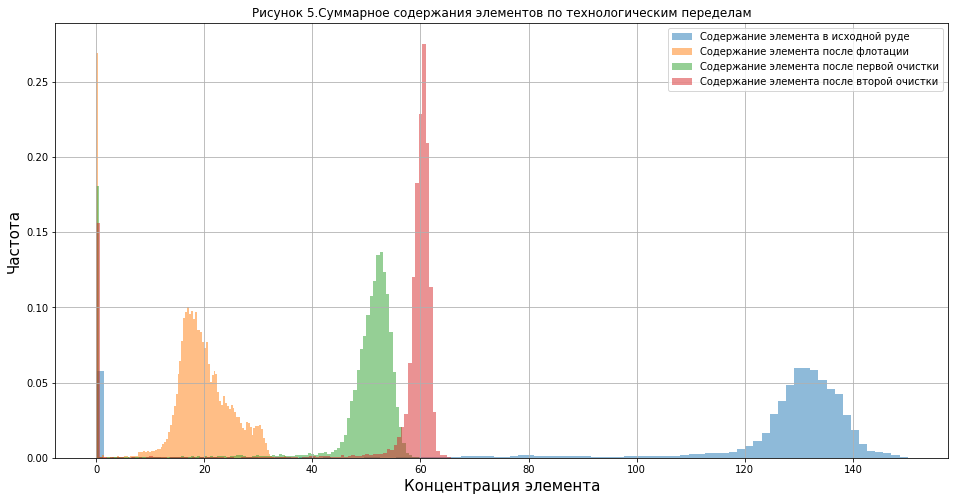

In [21]:
name='Рисунок 5.Суммарное содержания элементов по технологическим переделам'
concentrate_plot (df_train_sum['sum_elements'],df_train_sum['rougher.input.feed_sum'], 
                  df_train_sum['primary_cleaner.output.concentrate_sum'],
                     df_train_sum['final.output.concentrate_sum'])

### ВЫВОД 2###
- Из рисунков 1-3 видно, что концентрация элементов в ходе очистки изменяется неравномерно. Так рисунок 1 показывает, что концентрация золота возрастает с примерно 8 в исходной руде до примерно 45 в конечном концентрате. При этом свинец больше концентрируется в конечном концентрате, а серебро распределено по переделам неравномерно. 
- Рисунок 4 и проверка гипотез показывают, что распределение сырья по крупности в тренировочной и тестовой выборках различаются. Следовательно разделение на выборки проведено не совсем верно. Не очень понятно, что с этим делать дальше и можно ли обучать модели на такой выборке. 
- Рисунки 1-3 показывают, что в выборке содержится значительное количество строк с нулевым содержанием элементов. Таблица 1 и рисунок 2 свидетельствуют, что аномальное поведение концентрации элементов связано в основном с содержанием серебра. Рисунок 5 показывает, что даже в конечном концентрате содержится довольно большое количество наблюдений с нулевым суммарным содержанием элементов. Для обучения моделей необходимо удалить записии с нулевыми значениями в сумме элементов. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
Графический анлиз - то, что надо. 

# <a id='part5'>5. ПОДГОТОВКА К ОБУЧЕНИЮ МОДЕЛЕЙ </a>
<a href='#table of contents'>к оглавлению</a>

***Удалим нулевые значения в наблюдениях с суммарной нулевой концентрацией по всем элементам*** 

In [22]:
#получим индексы наблюдений с суммарной нулевой концентрацией на каждом этапе

df_zero_sum_index_rougher=df_train_sum[df_train_sum['rougher.input.feed_sum']==0].index 
df_zero_sum_index_primary_cleaner=df_train_sum[df_train_sum['primary_cleaner.output.concentrate_sum']==0].index 
df_zero_sum_index_final=df_train_sum[df_train_sum['final.output.concentrate_sum']==0].index 
df_zero_sum_index=df_train_sum[df_train_sum['sum_elements']==0].index 

df_index_sum=[df_zero_sum_index_rougher, df_zero_sum_index_primary_cleaner, df_zero_sum_index_final, df_zero_sum_index]

# Объединим списки

def listmerge(lstlst):
    all=[]
    for lst in lstlst:
      all.extend(lst)
    return all

df_sum_index_sum=listmerge(df_index_sum)

#удалим повторяющиеся значения и отсортируем общий список по возрастанию

result_zero_index = sorted(list(set(df_sum_index_sum)))

#выведем промежуточные значения индексов и общий список индексов

print(df_zero_sum_index_rougher)
print(df_zero_sum_index_primary_cleaner)
print(df_zero_sum_index_final)
print(df_zero_sum_index)
print(result_zero_index)

Int64Index([   99,   100,   101,   102,   103,   104,   105,   106,   107,
              108,
            ...
            12047, 12048, 12049, 12050, 12051, 12052, 12053, 12054, 12055,
            12056],
           dtype='int64', length=1213)
Int64Index([   19,    22,    30,    73,    76,    91,    92,    99,   100,
              101,
            ...
            12054, 12055, 12056, 12057, 12067, 12070, 12085, 12086, 12146,
            12280],
           dtype='int64', length=1284)
Int64Index([   99,   100,   101,   102,   103,   104,   105,   106,   107,
              108,
            ...
            12051, 12052, 12053, 12054, 12055, 12056, 12057, 12058, 12059,
            12060],
           dtype='int64', length=1320)
Int64Index([   99,   100,   101,   102,   103,   104,   105,   106,   107,
              108,
            ...
            12047, 12048, 12049, 12050, 12051, 12052, 12053, 12054, 12055,
            12056],
           dtype='int64', length=1100)
[19, 22, 30, 73, 76, 91,

Удалим нулевые значения из тестовой, тренировочной и общей выборок

In [23]:
df_full_drop=df_full.drop(result_zero_index)

In [24]:
df_test_drop=df_test.drop(result_zero_index[:634])

In [25]:
df_train_drop=df_train.drop(result_zero_index)

Выведем получившиеся датафреймы

In [26]:
display(df_full_drop.info())
display(df_test_drop.info())
display(df_train_drop.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21199 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  21199 non-null object
final.output.concentrate_ag                           21199 non-null float64
final.output.concentrate_pb                           21199 non-null float64
final.output.concentrate_sol                          21199 non-null float64
final.output.concentrate_au                           21199 non-null float64
final.output.recovery                                 21199 non-null float64
final.output.tail_ag                                  21199 non-null float64
final.output.tail_pb                                  21199 non-null float64
final.output.tail_sol                                 21199 non-null float64
final.output.tail_au                                  21199 non-null float64
primary_cleaner.input.sulfate                         21199 non-null float64
primary_cleaner.input.depressant             

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222 entries, 0 to 5809
Data columns (total 53 columns):
date                                          5222 non-null object
primary_cleaner.input.sulfate                 5222 non-null float64
primary_cleaner.input.depressant              5222 non-null float64
primary_cleaner.input.feed_size               5222 non-null float64
primary_cleaner.input.xanthate                5222 non-null float64
primary_cleaner.state.floatbank8_a_air        5222 non-null float64
primary_cleaner.state.floatbank8_a_level      5222 non-null float64
primary_cleaner.state.floatbank8_b_air        5222 non-null float64
primary_cleaner.state.floatbank8_b_level      5222 non-null float64
primary_cleaner.state.floatbank8_c_air        5222 non-null float64
primary_cleaner.state.floatbank8_c_level      5222 non-null float64
primary_cleaner.state.floatbank8_d_air        5222 non-null float64
primary_cleaner.state.floatbank8_d_level      5222 non-null float64
rougher.in

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15343 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  15343 non-null object
final.output.concentrate_ag                           15343 non-null float64
final.output.concentrate_pb                           15343 non-null float64
final.output.concentrate_sol                          15343 non-null float64
final.output.concentrate_au                           15343 non-null float64
final.output.recovery                                 15343 non-null float64
final.output.tail_ag                                  15343 non-null float64
final.output.tail_pb                                  15343 non-null float64
final.output.tail_sol                                 15343 non-null float64
final.output.tail_au                                  15343 non-null float64
primary_cleaner.input.sulfate                         15343 non-null float64
primary_cleaner.input.depressant             

None

Добавим в тестовую выборку целевые признаки для обучения моделей

In [27]:
#создадим таблицу с нужными значениями
df_full_2=df_full_drop[['final.output.recovery', 'rougher.output.recovery', 'date']]
display(df_full_2.head())
#объединим полученную таблицу с тестовыми данными
df_test_drop=df_full_2.merge(df_test_drop, on='date', how='inner')
display(df_test.head(50))

,final.output.recovery,rougher.output.recovery,date
0,70.54,87.11,2016-01-15 00:00:00
1,69.27,86.84,2016-01-15 01:00:00
2,68.12,86.84,2016-01-15 02:00:00
3,68.35,87.23,2016-01-15 03:00:00
4,66.93,86.69,2016-01-15 04:00:00


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,...,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,...,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,...,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,...,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,...,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86
5,2016-09-01 05:59:59,168.49,8.82,7.42,0.79,1402.83,-499.30,1401.51,-499.21,1404.09,...,12.03,-499.81,8.04,-500.37,8.04,-510.04,4.98,-499.99,24.98,-500.48
6,2016-09-01 06:59:59,144.13,7.92,7.42,0.79,1398.25,-499.75,1393.26,-499.20,1396.74,...,12.03,-499.47,8.03,-500.98,7.91,-507.96,5.01,-500.04,25.04,-499.50
7,2016-09-01 07:59:59,133.51,8.06,6.99,0.80,1401.67,-501.78,1400.75,-502.51,1400.47,...,12.04,-501.29,8.02,-499.19,8.12,-511.93,5.04,-500.15,25.03,-503.97
8,2016-09-01 08:59:59,133.74,8.00,6.94,0.79,1402.36,-499.98,1400.99,-496.80,1401.17,...,12.00,-499.48,8.01,-500.90,7.97,-521.20,5.06,-499.79,25.01,-497.61
9,2016-09-01 09:59:59,126.96,8.02,7.03,0.81,1400.82,-499.01,1399.98,-499.57,1401.87,...,12.04,-499.99,7.99,-499.75,7.99,-509.95,5.07,-499.29,24.99,-499.27


Удалим из тренировочной выборки признаки которые не участвуют в расчете целевых показателей

In [28]:
#получим список признаков тестовой выборки
columns_test=df_test_drop.columns

#получим список признаков тренировочной выборки
columns_train=df_train_drop.columns

#получим список признаков которых нет в тестовой выборке

columns_sum=[]

for i in columns_train:
    if i not in columns_test:
        columns_sum.append(i)

#удалим лишние признаки из тренировочного датасета
df_train_drop=df_train_drop.drop(columns_sum, axis = 1)


In [29]:
display(df_train_drop.info())
display(df_train_drop.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15343 entries, 0 to 16859
Data columns (total 55 columns):
date                                          15343 non-null object
final.output.recovery                         15343 non-null float64
primary_cleaner.input.sulfate                 15343 non-null float64
primary_cleaner.input.depressant              15343 non-null float64
primary_cleaner.input.feed_size               15343 non-null float64
primary_cleaner.input.xanthate                15343 non-null float64
primary_cleaner.state.floatbank8_a_air        15343 non-null float64
primary_cleaner.state.floatbank8_a_level      15343 non-null float64
primary_cleaner.state.floatbank8_b_air        15343 non-null float64
primary_cleaner.state.floatbank8_b_level      15343 non-null float64
primary_cleaner.state.floatbank8_c_air        15343 non-null float64
primary_cleaner.state.floatbank8_c_level      15343 non-null float64
primary_cleaner.state.floatbank8_d_air        15343 non-null flo

None

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.54,127.09,10.13,7.25,0.99,1549.78,-498.91,1551.43,-516.40,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,69.27,125.63,10.30,7.25,1.00,1576.17,-500.90,1575.95,-499.87,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,68.12,123.82,11.32,7.25,0.99,1601.56,-500.00,1600.39,-500.61,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,68.35,122.27,11.32,7.25,1.00,1599.97,-500.95,1600.66,-499.68,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,66.93,117.99,11.91,7.25,1.01,1601.34,-498.98,1601.44,-500.32,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50
5,2016-01-15 05:00:00,69.47,115.58,12.47,7.25,0.97,1602.96,-498.09,1602.07,-500.18,...,13.94,-500.97,11.88,-500.40,10.05,-496.37,7.97,-499.36,14.02,-599.71
6,2016-01-15 06:00:00,69.30,117.32,12.47,7.25,0.90,1597.53,-500.99,1602.82,-500.70,...,14.05,-500.97,12.09,-500.50,10.00,-497.08,8.01,-500.00,14.03,-600.91
7,2016-01-15 07:00:00,70.23,124.59,12.47,7.25,0.90,1597.95,-501.59,1601.08,-499.49,...,13.97,-501.82,12.10,-500.58,9.87,-499.17,7.99,-499.79,13.98,-600.41
8,2016-01-15 08:00:00,69.69,131.78,12.47,7.25,0.89,1601.67,-499.55,1598.80,-499.69,...,13.96,-504.25,12.06,-501.17,10.03,-501.18,7.88,-499.73,13.97,-599.06
9,2016-01-15 09:00:00,70.28,138.12,12.46,7.25,0.90,1603.44,-499.86,1597.46,-500.27,...,13.99,-503.20,12.05,-500.93,9.96,-502.99,7.98,-500.15,13.98,-598.07


# <a id='part6'> 6. ОБУЧЕНИЕ МОДЕЛЕЙ </a>
<a href='#table of contents'>к оглавлению</a>

***Получим данные для обучения моделей***

In [30]:
r=42

In [31]:
display(df_train_drop)

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.54,127.09,10.13,7.25,0.99,1549.78,-498.91,1551.43,-516.40,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,69.27,125.63,10.30,7.25,1.00,1576.17,-500.90,1575.95,-499.87,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,68.12,123.82,11.32,7.25,0.99,1601.56,-500.00,1600.39,-500.61,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,68.35,122.27,11.32,7.25,1.00,1599.97,-500.95,1600.66,-499.68,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,66.93,117.99,11.91,7.25,1.01,1601.34,-498.98,1601.44,-500.32,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,73.76,123.38,8.03,6.50,1.30,1648.42,-400.38,1648.74,-400.36,...,23.03,-501.17,20.01,-499.74,18.01,-499.83,13.00,-500.16,20.01,-501.30
16856,2018-08-18 07:59:59,69.05,120.88,7.96,6.50,1.30,1649.82,-399.93,1649.36,-399.72,...,22.96,-501.61,20.04,-500.25,18.00,-500.40,12.95,-499.90,19.97,-501.04
16857,2018-08-18 08:59:59,67.00,105.67,7.96,6.50,1.32,1649.17,-399.89,1649.20,-399.68,...,23.02,-501.71,19.95,-499.86,18.02,-500.45,13.02,-499.91,19.99,-501.52
16858,2018-08-18 09:59:59,65.52,98.88,7.98,6.50,1.24,1646.55,-398.98,1648.21,-400.38,...,23.02,-501.15,20.05,-500.31,17.98,-499.27,12.99,-499.98,20.01,-500.63


In [32]:
features=df_train_drop.drop(['rougher.output.recovery','final.output.recovery'], axis=1) # определим признаки
target=df_train_drop[['rougher.output.recovery','final.output.recovery']] # определим целевые признаки
display(features)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,127.09,10.13,7.25,0.99,1549.78,-498.91,1551.43,-516.40,1549.87,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,125.63,10.30,7.25,1.00,1576.17,-500.90,1575.95,-499.87,1575.99,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,123.82,11.32,7.25,0.99,1601.56,-500.00,1600.39,-500.61,1602.00,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,122.27,11.32,7.25,1.00,1599.97,-500.95,1600.66,-499.68,1600.30,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,117.99,11.91,7.25,1.01,1601.34,-498.98,1601.44,-500.32,1599.58,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,123.38,8.03,6.50,1.30,1648.42,-400.38,1648.74,-400.36,1648.58,...,23.03,-501.17,20.01,-499.74,18.01,-499.83,13.00,-500.16,20.01,-501.30
16856,2018-08-18 07:59:59,120.88,7.96,6.50,1.30,1649.82,-399.93,1649.36,-399.72,1648.66,...,22.96,-501.61,20.04,-500.25,18.00,-500.40,12.95,-499.90,19.97,-501.04
16857,2018-08-18 08:59:59,105.67,7.96,6.50,1.32,1649.17,-399.89,1649.20,-399.68,1647.90,...,23.02,-501.71,19.95,-499.86,18.02,-500.45,13.02,-499.91,19.99,-501.52
16858,2018-08-18 09:59:59,98.88,7.98,6.50,1.24,1646.55,-398.98,1648.21,-400.38,1648.92,...,23.02,-501.15,20.05,-500.31,17.98,-499.27,12.99,-499.98,20.01,-500.63


***Стандартизируем признаки***

In [33]:

scaler = StandardScaler()
scaler.fit(features.loc[:,'primary_cleaner.input.sulfate' : 'secondary_cleaner.state.floatbank6_a_level'])
features.loc[:,'primary_cleaner.input.sulfate' : 'secondary_cleaner.state.floatbank6_a_level'] = scaler.transform(features.loc[:,'primary_cleaner.input.sulfate' : 'secondary_cleaner.state.floatbank6_a_level'])
display(features)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,-0.07,0.40,-0.09,0.32,-0.13,-0.12,-0.13,-0.43,-0.13,...,-0.96,-0.30,-0.59,-0.59,-1.05,-0.18,-0.80,-0.20,-0.81,-1.85
1,2016-01-15 01:00:00,-0.11,0.44,-0.09,0.35,-0.02,-0.16,-0.03,-0.11,-0.03,...,-0.96,-0.35,-0.62,-0.54,-1.03,-0.22,-0.82,-0.20,-0.84,-1.73
2,2016-01-15 02:00:00,-0.15,0.72,-0.09,0.32,0.08,-0.14,0.07,-0.13,0.08,...,-0.96,-0.30,-0.62,-0.54,-1.03,-0.22,-0.82,-0.20,-0.83,-1.76
3,2016-01-15 03:00:00,-0.18,0.72,-0.09,0.34,0.08,-0.16,0.07,-0.11,0.07,...,-0.95,-0.28,-0.61,-0.54,-1.04,-0.20,-0.82,-0.19,-0.84,-1.73
4,2016-01-15 04:00:00,-0.28,0.88,-0.09,0.37,0.08,-0.12,0.08,-0.12,0.07,...,-0.96,-0.26,-0.62,-0.54,-1.05,-0.25,-0.84,-0.19,-0.84,-1.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,-0.16,-0.17,-1.32,1.11,0.28,1.83,0.27,1.80,0.27,...,0.54,-0.28,0.87,-0.52,0.26,-0.21,0.04,-0.19,0.15,0.18
16856,2018-08-18 07:59:59,-0.21,-0.19,-1.32,1.10,0.28,1.84,0.28,1.81,0.27,...,0.53,-0.29,0.87,-0.52,0.26,-0.23,0.03,-0.19,0.14,0.19
16857,2018-08-18 08:59:59,-0.56,-0.19,-1.32,1.14,0.28,1.84,0.28,1.81,0.27,...,0.54,-0.29,0.86,-0.52,0.27,-0.23,0.04,-0.19,0.14,0.18
16858,2018-08-18 09:59:59,-0.71,-0.19,-1.32,0.95,0.27,1.86,0.27,1.80,0.27,...,0.54,-0.28,0.88,-0.53,0.26,-0.20,0.03,-0.19,0.15,0.19


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>Внимательно подошёл к этой проблеме, ОК. пару строк на эту тему:<br>
    
В некоторых проектах - это важно, избавиться от выбросов<br>

И вот если обратиться к нашему проекту:<br>
1) Есть нулевые аномалии - и их надо "убить" это точно: просто зачем нам нулевые измерения.<br>
    
2)А вот с выбросами как в приниципе..<br>
Тут на обсуждение: наша цель - предсказывать модель на реальных данных. И вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.<br>
    
Кстати<br>
если говорить о теории выбросов, то вот это интервал q3+-1.5*iqr говорит действильно о них самых<br>
Но нет рекоммендаций к их удалению. Говорят так "на усмотрение бизнеса".<br>
А вот если взять вот этот интервал q3+3*iqr:  то тут уж с очень высокой вероятность можно говорить о грубых выбросах.

***Напишем функции для вычисления метрик***

sMAPE рассчитывается по формуле

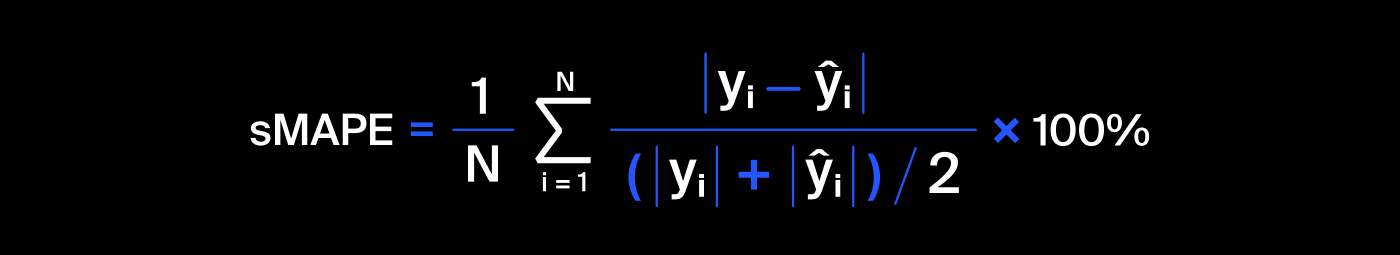

In [34]:
display(Image('https://pictures.s3.yandex.net/resources/smape_1576239058.jpg'))

In [35]:
def sMAPE_func (target, predicted):
    sMAPE=(1/len(target)*np.sum(2*np.abs(target-predicted)/(np.abs(target)+np.abs(predicted))))*100
    return sMAPE

Итоговое sMAPE рассчитывается по формуле

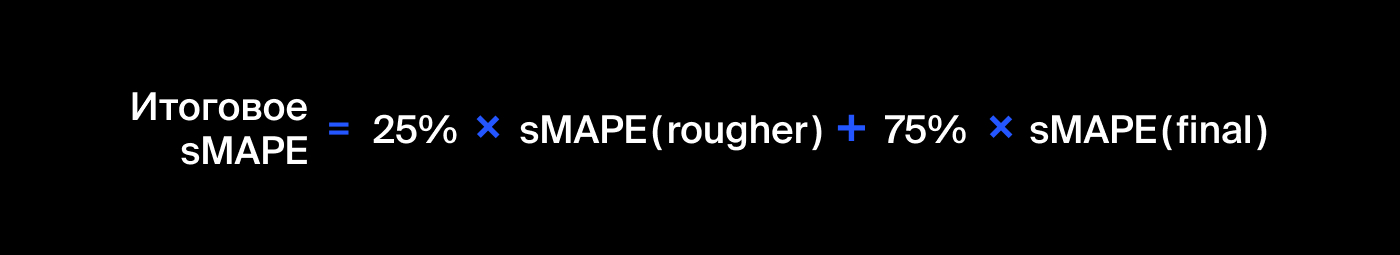

In [36]:
display(Image('https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg'))

In [37]:
def sMAPE_func_total  (sMAPE_rougher, sMAPE_final):
    sMAPE_total=0.25*sMAPE_rougher+0.75*sMAPE_final
    return  sMAPE_total

## <a id='part7'> 6.1. Обучение моделей для предсказания rougher.output.recovery </a>
<a href='#table of contents'>к оглавлению</a>

Для обучения модели необходимо использовать только те признаки которые характеризуют исходное сырье и этап флотации

In [38]:
features_rougher=features[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',]]
target_rougher=target['rougher.output.recovery']

display(features_rougher.head())
display(target_rougher.head())

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,-0.98,-0.93,0.52,-0.19,0.23,-0.52,0.16,0.23,0.19,0.25,...,1.33,0.56,1.29,0.46,1.67,0.32,1.55,0.23,1.95,0.28
1,-0.95,-0.95,0.53,-0.13,0.10,-0.53,0.15,0.23,0.23,0.25,...,1.32,0.31,1.28,0.33,1.68,0.34,1.53,0.31,1.86,0.31
2,-0.97,-1.03,0.57,-0.12,0.12,-0.58,0.14,0.36,0.21,0.37,...,1.32,0.31,1.28,0.32,1.68,0.34,1.53,0.32,1.87,0.30
3,-1.00,-1.13,0.67,-0.11,0.24,-0.68,0.06,0.36,0.16,0.37,...,1.32,0.30,1.28,0.33,1.67,0.34,1.54,0.32,1.87,0.31
4,-0.99,-1.33,0.65,-0.17,-0.08,-0.87,-0.12,0.36,-0.02,0.36,...,1.32,0.32,1.28,0.32,1.68,0.34,1.54,0.34,1.87,0.30


0   87.11
1   86.84
2   86.84
3   87.23
4   86.69
Name: rougher.output.recovery, dtype: float64

Создадим функции для обучения моделей

In [39]:
#функция для обучения через кросс-валидацию

my_scorer = make_scorer(sMAPE_func, greater_is_better=False)

def learning_model (features, target, model):
    final_score=cross_val_score(model, features, target, scoring=my_scorer, cv=5)
    print("Среднее sMAPE:", final_score.mean())
    return final_score.mean()

#функция для обучения через GridSearchCV

def learning_model_Grid (model, features, target):
    grid=GridSearchCV(model, parametrs, scoring=my_scorer, cv=5)
    model_fit=grid.fit(features, target)
    print("Лучшее sMAPE:", grid.best_score_)
    print("Лучшие параметры:", grid.best_params_)
    return model_fit

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='red'><br>
greater_is_better=True - тут False больше подходит. Нам же надо минимум. Поэтому "Больше_лучше"=ложь).


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
<font color='green'><br>
Николай, я поправил метрику. Я не стал переделывать  
для случайного леса, так как там ждать 3 часа. Понятно, что метрика будет такая же, но со знаком "-". 
Получается, что наибольшее отрицательное число нам подходит, тоесть -8.41. Лучшая модель случайный лес.


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>Да, всё правильно. Конечно же не надо пересчитывать. Главное - есть внимание к проблематике.

***Обучим модель линейной регресии***

In [73]:
model_rougher_linear = LinearRegression()
sMAPE_LinReg_rougher=learning_model(features_rougher, target_rougher, model_rougher_linear)

Среднее sMAPE: -13.929554233940753


***Обучим модель дерева решений***

In [41]:
#создадим словарь с перебираемыми параметрами
parametrs = { 'max_depth': range (1,20, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)}

In [42]:
%%time

model = DecisionTreeRegressor(random_state=r) 
learning_model_Grid(model, features_rougher, target_rougher)

Лучшее sMAPE: -12.1951656646231
Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
CPU times: user 7min 3s, sys: 248 ms, total: 7min 3s
Wall time: 7min 10s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)},
             pre_dispatch='2*n_jobs',

***Обучим модель случайного леса***

In [43]:
#создадим словарь с перебираемыми параметрами
parametrs = { 'n_estimators': range (10, 20, 2),
              'max_depth': range (1,12, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)}

%%time

model=RandomForestRegressor()
learning_model_Grid(model, features_rougher, target_rougher)

***Переобучил модель с исправленным параметром greater_is_better=False***

Обучалось 2 часа, поэтому показываю код с лучшими параметрами

Лучшие параметры: { max_depth=11, min_samples_leaf=2, min_samples_split=6, n_estimators=10}  
Подбор параметров занял - ***Wall time: 1h 54min 56s***

In [44]:
model_rougher = RandomForestRegressor(random_state=r, max_depth=11, min_samples_leaf=2,   
                              min_samples_split=6, n_estimators=10) 

model_rougher.fit(features_rougher, target_rougher) 
predictions = model_rougher.predict(features_rougher)
result = sMAPE_func (target_rougher, predictions)
print("Лучшее SMAPe:", result)

Лучшее SMAPe: 8.403835252693467


***Сравним точность моделей*** 

In [45]:
data = {'Модель,': ['Линейная регрессия', 'Дерево решений', 'Случайный лес'], 
        'sMAPE,%': [-13.92, -21, -8.40]}
table= pd.DataFrame.from_dict(data)
print('Таблица 3. Сравнение качества предсказания моделей на тренировочной выборке')
display(table)

Таблица 3. Сравнение качества предсказания моделей на тренировочной выборке


,"Модель,","sMAPE,%"
0,Линейная регрессия,-13.92
1,Дерево решений,-21.00
2,Случайный лес,-8.40


Получим тестовую выборку

In [46]:
features_rougher_test=df_test_drop[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',]]

target_rougher_test=df_test_drop['rougher.output.recovery']
display(features_rougher_test.head())
display(target_rougher_test.head())

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,...,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18
1,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,...,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79
2,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,...,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86
3,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,...,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80
4,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,...,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28


0   89.99
1   88.09
2   88.41
3   87.36
4   83.24
Name: rougher.output.recovery, dtype: float64

In [75]:
 
predictions = model_rougher.predict(features_rougher_test)
result = sMAPE_func (target_rougher_test, predictions)

print("Лучшее SMAPe:", result)

Лучшее SMAPe: 43.08305875808276


***Сравним лучшую модель с константной моделью*** 

In [48]:
#pd.Series(target_final.mean(), index=target_final.index) 
result = sMAPE_func (target_rougher_test, target_rougher_test.mean())
print("Лучшее SMAPe:", result)   

Лучшее SMAPe: 8.588252445706134


### Промежуточный вывод: ###
Обученная модель адекватна

## <a id='part8'> 6.2. Обучение моделей для предсказания final.output.recovery </a>
<a href='#table of contents'>к оглавлению</a>

Получим признаки для обучения моделей

In [52]:
features_final=features.drop(['date'], axis=1)
target_final=target['final.output.recovery']

display(features_final.head())
display(target_final.head())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.07,0.40,-0.09,0.32,-0.13,-0.12,-0.13,-0.43,-0.13,-0.11,...,-0.96,-0.30,-0.59,-0.59,-1.05,-0.18,-0.80,-0.20,-0.81,-1.85
1,-0.11,0.44,-0.09,0.35,-0.02,-0.16,-0.03,-0.11,-0.03,-0.12,...,-0.96,-0.35,-0.62,-0.54,-1.03,-0.22,-0.82,-0.20,-0.84,-1.73
2,-0.15,0.72,-0.09,0.32,0.08,-0.14,0.07,-0.13,0.08,-0.15,...,-0.96,-0.30,-0.62,-0.54,-1.03,-0.22,-0.82,-0.20,-0.83,-1.76
3,-0.18,0.72,-0.09,0.34,0.08,-0.16,0.07,-0.11,0.07,-0.15,...,-0.95,-0.28,-0.61,-0.54,-1.04,-0.20,-0.82,-0.19,-0.84,-1.73
4,-0.28,0.88,-0.09,0.37,0.08,-0.12,0.08,-0.12,0.07,-0.15,...,-0.96,-0.26,-0.62,-0.54,-1.05,-0.25,-0.84,-0.19,-0.84,-1.76


0   70.54
1   69.27
2   68.12
3   68.35
4   66.93
Name: final.output.recovery, dtype: float64

***Обучим модель линейной регресии***

In [53]:
model = LinearRegression()
sMAPE_LinReg_rougher=learning_model(features_final, target_final, model)

Среднее sMAPE: -13.520026882744427


***Обучим модель дерева решений***

In [54]:
#создадим словарь с перебираемыми параметрами
parametrs = { 'max_depth': range (1,10, 2),
              'min_samples_leaf': range (1,6),
              'min_samples_split': range (2,6,2)}

In [55]:
%%time

model = DecisionTreeRegressor(random_state=r) 
learning_model_Grid(model, features_final, target_final)

Лучшее sMAPE: -11.77262961298181
Лучшие параметры: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
CPU times: user 1min 41s, sys: 51.5 ms, total: 1min 41s
Wall time: 1min 43s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6, 2)},
             pre_dispatch='2*n_jobs', 

***Обучим модель случайного леса***

Обучим модель с лучшими параметрами

In [57]:
model_rougher = RandomForestRegressor(random_state=r, max_depth=11, min_samples_leaf=2,   
                              min_samples_split=6, n_estimators=10) 

model_rougher.fit(features_final, target_final) 
predictions = model_rougher.predict(features_final)
result = sMAPE_func (target_final, predictions)
print("Лучшее SMAPe:", result)

Лучшее SMAPe: 6.06467250412148


***Сравним точность моделей*** 

In [58]:
data = {'Модель,': ['Линейная регрессия', 'Дерево решений', 'Случайный лес'], 
        'sMAPE,%': [-13.52, -11.77, -6.07]}
table= pd.DataFrame.from_dict(data)
print('Таблица 4. Сравнение качества предсказания моделей на тренировочной выборке')
display(table)

Таблица 4. Сравнение качества предсказания моделей на тренировочной выборке


,"Модель,","sMAPE,%"
0,Линейная регрессия,-13.52
1,Дерево решений,-11.77
2,Случайный лес,-6.07


***Промежуточный вывод***  
Модель случайного леса также показала лучшие результаты 

***Проверим предсказания модели на тестовых данных***

Получим признаки и целевой признак

In [59]:
features_final_test=df_test_drop.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)

target_final_test=df_test_drop['final.output.recovery']

display(features_final_test.head())
display(target_final_test.head())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,...,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,...,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,...,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,...,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,...,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


0   70.27
1   68.91
2   68.14
3   67.78
4   61.47
Name: final.output.recovery, dtype: float64

In [60]:
model_final = RandomForestRegressor(random_state=r, max_depth=11, min_samples_leaf=2,   
                              min_samples_split=6, n_estimators=10) 

model_final.fit(features_final, target_final) 
predictions = model_final.predict(features_final_test)
result = sMAPE_func (target_final_test, predictions)

print("Лучшее SMAPe:", result)

Лучшее SMAPe: 15.373506062813865


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='red'><br>Извини, в прошлый раз заметил, а потом вылетело из головы и не написал: когда мы работаем уже на тесте, то обучаем всё равно на трайне. Т.е. не может быть такого, что и обучаем и проверяем на одной и тойже выборке.


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА 2</u></b>
<font color='green'><br>
 Косяк знатный у меня, как я сам не заметил(. Теперь значения метрик на тестовой выборке хуже, чем на 
    тренировочной. Как такое может быть, если я делал кросс-валижацию? Переобучения быть не должно. 

***Сравним лучшую модель с константной моделью*** 

In [61]:
result = sMAPE_func (target_final_test, target_final_test.mean())
print("Лучшее SMAPe:", result)   

Лучшее SMAPe: 13.411238323536262


***Промежуточный вывод***  
Модель адекватна

*********************

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='red'><br> Ты про проверку спросил. Если я правильно тебя понял,ТО: константная модель удобно так будет - берём таргет на трайн-выборке, ище среднее/медиану. И говорим, что вот такое ожидается и в тест периоде. А дальше проверяем расчитанную медиану с тарегт_тестом. Я ответил на тот вопрос?


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА 2</u></b>
<font color='green'><br>
Попробовал сделать как понял. Константная модель теперь лучше моей. Я окончательно запутался... 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 3</u></b>
<font color='red'><br>Привет, Дмитрий! Спасибо, за доработки.<br>
На трайне - действительно метрика хорошая. Константная - ОК. А вот на тесте... ожидается, что примерно также будет как и у константной. В одной из моделй, у тебя получается 47 метрика... Тут однозначно надо проверять тест-выборку.<br>
Возможно, Что одни из ошибок закралась:<br>
1) Или индескы "поплыли"<br>
2) Или факторы не так "встали"...<br>
В общем, надо бы проверить тест-выборку - всё ли там как должно быть.<br>
Будет у тебя на это время?<br>
    
C наступающим праздником и мирно неба над головой!


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА 3</u></b>
<font color='green'><br>
Перепроверил все данные для получения тестовой выборки (ячейки 21 и 38). Никакой ошибки я не смог найти, вроде все правильно.  
На тестовых данных плохо  предсказывает модель в ячейке 47, там тоже я ошибок не нашел. 
Я подумал, что плохие показатели могут быть связаны с тем, что я добавлял целевые признаки в тестовую
выборку по индексам, а не по дате. Сделал по дате и метрика еще ухудшилась. У меня больше нету вариантов в
чем может быть проблема. При этом предсказания для final гораздо лучше... 
Раз ты спросил меня насчет наличия времени, то я бы хотел нагнать за эти 
выходные группу, но я не могу потому что у меня нету доступа к тренажеру из-за этого проекта(. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 4</u></b>
Ок, понял,  Дмитрий по времени.<br>
Тут однозначно ещё раз надо будет тебе посмотреть на формириование тестовой выборки. В ней дело...<br>
Можно будет пойти так:
1)взять факторы в исходной тест-выборке.<br>
2)нарастить её таргет-факторами, соединив по дате.<br>
3)взять факторы в трайн выборки только те, что есть в тресте.<br>
Просто ошибка в 30 -50  - это всегда оооочень подозрительно...<br>
    
Ок, следующий проект должен быть полегче...<br>    
УСПЕШНО ТЕБЕ ЗА ВЫХОДНЫЕ НАГНАТЬ! <br>

In [62]:

predictions = pd.Series(target_final.mean(), index=target_final.index) 
result = sMAPE_func (target_final_test, predictions)

print("Лучшее SMAPe:", result)

Лучшее SMAPe: 11.668399269487505


********************


## <a id='part9'> 7. Расчет итогового sMAPE </a>
<a href='#table of contents'>к оглавлению</a>

In [65]:
sMAPE_rourgher=54.90
sMAPE_final=15.37
sMAPE_func_total (sMAPE_rourgher, sMAPE_final)

25.252499999999998

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Дмитрий, интересную работу ты провёл.<br>
Понятно, логично, вдумчиво<br>
Видна хорошая предвариателная работа с данными, уместный графический анализ, осмысленная аналитика и дельная модельная работа - многое удалось как надо)<br>
    
Метрика - достаточно низкая. И это хорошо.<br>
вот только не понятно насколько))<br>
По хорошему, здесь надо понять: наша модель предсказывает лучше, чем просто по среднему.<br>
(например, в формулу метрики предиктом подставить медианные значения таргет-трайна). <br>
<font color='red'>
Покажи, пожалуйста, сравнение и вывод относительно константной модели)<br>
    
И с параматром собственной метрики - посмотри, пожалуйста.<br>
<font color='green'>    
Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ!


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ СТУДЕНТА</u></b>
<font color='green'><br>
Николай привет! Спасибо за оценку моего проекта.Метрику я поправил, комментарии после 38 ячейки.
Проверку адеватности модели я сделал в ячейках 47 и 56. Это сделано неверно? Я не понимаю зачем подставлять в формулу предиктом? Почему нельзя сразу в формулу метрики подставить средний таргет, как сделал я? Также было сделано в уроке тренажера (https://praktikum.yandex.ru/trainer/data-scientist/lesson/086ad029-82fa-4ee6-b4df-e8857af7601f/task/e3ab2592-7b7e-4002-8ba8-62dab0d6a3eb/). 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
<font color='red'><br>Дмитрий, доброго дня!
Пару моментов:<br>
1) перевый - по метрике на тесте: забыл обратить внимание на то, что мы должны обучать на тране, а проверять на тесте.<br>
2) Ответил на твой вопрос.<br>
Посмотри, пожалуйста.<br>
Пересчитывать 3 часа не надо)

# Основной вывод # 

- Лучшей моделью для предсказания целевых значений оказалась модель случайного леса. 
- Итовое значение sMAPE составило 25.25
- Адекватность моделей проверена их сравнением с константной моделью